In [148]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time

In [150]:
mat = scipy.io.loadmat('mnist-original.mat')
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])

In [151]:
X = [] # on créé une nouvelle liste qui va contenir nos vecteurs 784
for i in range(len(data)):
    X.append(data[i].reshape(28*28,1))

def index_chiffre(n,y):  # elle nous renvoie un tableau contenant les indices représentants le chiffre n
    index = []           # j'ai rajouté le y dans les arguments car je me servirai de cette fonction dans la suite
    for i in range(len(y)):
        if y[i]==n:
            index.append(i)
    return index

In [152]:
X_train, X_test, y_train, y_test = [], [], [], [] # comme la base de donnée est ordonnée, pour pouvoir diviser en train et test
for i in range(10): # on doit diviser en train test chaque set de chiffre, pour 0 pour 1 etc et on met tout dans nos matrices défeinies juste avant
    temp_x = [] # variable temporaire qui va contenir les matrices représentants le chiffre i
    temp_y = [] # variable temporaire qui va contenir les indexes représentants le chiffre i
    for j in index_chiffre(i,label):
        temp_x.append(X[j])
        temp_y.append(label[j])
    x_train, x_test, Y_train, Y_test = train_test_split(temp_x, temp_y, test_size=0.2) # on divise en train test pour chaque jeu de matrice représentant le chiffre i
    X_train += x_train # à chaque itération on les mets dans nos matrices précédemment définies
    X_test += x_test
    y_train += Y_train
    y_test += Y_test

In [153]:
def concat(k,X,y):
    res = np.zeros((28*28,len(index_chiffre(k,y))))
    for i,j in zip(index_chiffre(k,y),range(len(index_chiffre(k,y)))):
        res[:,j]=X[i][:,0]
    return res

**Création de la liste de dix matrices représentative des 10 chiffres**

In [154]:
start=time.time()
mat_chiffres = [] #future liste de 10 matrices ou mat_chiffres[i]=la matrice avec tous les représentations de i en colonnes
for k in range(10):
    mat_chiffres.append(concat(k,X_train,y_train)) 
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

Temps de réalisation : 8.093280792236328 secondes


**Création des décompositions SVD des dix matrices**

In [155]:
start=time.time()
U,S,V = [],[],[]
for k in range(10):
    U_temp,S_temp,V_temp = np.linalg.svd(mat_chiffres[k])
    U.append(U_temp)
    S.append(S_temp)
    V.append(V_temp)
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

Temps de réalisation : 91.29802227020264 secondes


**Fonction qui donne la norme de la résiduelle de la photo test "x" a l'espace du nombre "n" en utilisant les "k" premiers éléments de la base de l'espace**

In [156]:
def distance(x,n,k):
    I = np.mat(np.eye(28*28))
    Uk = np.transpose(np.transpose(np.mat(U[n]))[:k])
    return np.linalg.norm((I-Uk*np.transpose(Uk))*np.mat(x),2)

In [157]:
def prediction(x,k):
    l=[distance(x,n,k) for n in range(10)]
    return (float(l.index(min(l))))

**Test de la prédiction d'un 8 avec 3 éléments de la base**

In [167]:
start=time.time()
print(prediction(X_test[12000],3))
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

8.0
Temps de réalisation : 0.18863415718078613 secondes


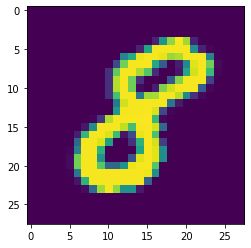

In [169]:
plt.imshow(X_test[12000].reshape(28,28))

**Définition des fonctions de pourcentage de précision**

In [160]:
def calcul_pourcentage_tot(k):
    prediction_l = [prediction(x,k) for x in X_test]
    A =[i for i,j in zip(y_test,prediction_l) if i==j]
    return len(A)*100/len(X_test)

In [161]:
def calcul_pourcentage_num(n,k):
    prediction_l = [prediction(X_test[x],k) for x in index_chiffre(n,y_test)]
    res = 0
    for x in prediction_l:
        if x == n :
            res += 1
    return res*100/len(index_chiffre(n,y_test))

**Calcul du pourcentage de précision pour le chiffre 0 avec 3 éléments de la base**

In [107]:
start=time.time()
print(calcul_pourcentage_num(0,3))
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

95.36567704561912
Temps de réalisation : 136.44287419319153 secondes


**Calcul précision en fonction des chiffre pour 3 éléments de la base, environ 20 minutes**

In [116]:
start=time.time()
pourcentage = [calcul_pourcentage_num(n,3) for n in range(10)]
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

Temps de réalisation : 1353.8932738304138 secondes


**Tracé de la précision en fonction du chiffre pour 3 éléments de la base**

<function matplotlib.pyplot.show(*args, **kw)>

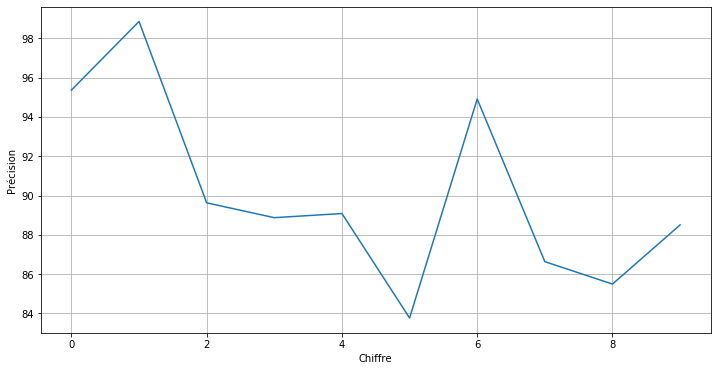

In [179]:
plt.figure(figsize=(12,6))
plt.plot(range(10),pourcentage)
plt.xlabel('Chiffre')
plt.ylabel('Précision')
plt.grid(True)
plt.show

**Calcul précision totale pour 2 éléments de la base, environ 20 min**

In [118]:
start=time.time()
print(calcul_pourcentage_tot(2))
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

86.93944587260782
1386.2230422496796


**Calcul de la précision totale en fonction du nombres d'éléments de la base utilisés, environ 3-4h**

In [162]:
start=time.time()
pourcentage_tot = [calcul_pourcentage_tot(k) for k in range(1,11)]
end=time.time()
dsgvd&&@@gvf #j'ai écris n'importe quoi pour que ça ne lance pas puisque ça prend 3h50
print("Temps de réalisation : " + str(end-start) + " secondes")

13769.047308444977


**pourcentage_tot obtenu après 4h de calcul**

In [ ]:
pourcentage_tot_exemple = [80.37703513281919,
 86.15395601256783,
 89.58154812910597,
 91.3167666381034,
 92.10939731505285,
 92.66638103399029,
 93.21622393601828,
 93.63039131676663,
 94.01599542987718,
 94.00171379605827]

**Tracé de la précision totale en fonction du nombres d'éléments de la base utilisés**

<function matplotlib.pyplot.show(*args, **kw)>

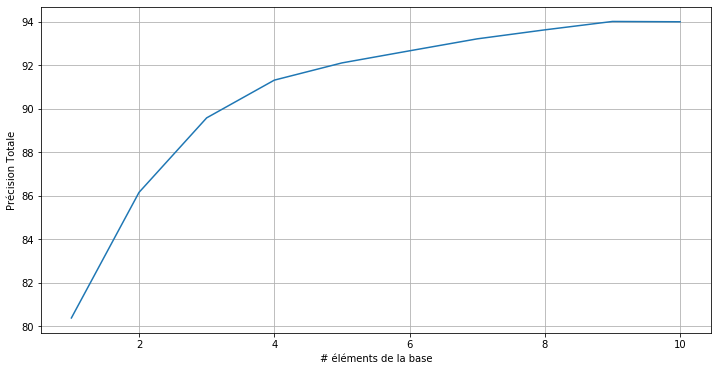

In [178]:
abscisses = list(range(1,11))
plt.figure(figsize=(12,6))
plt.plot(range(1,11),pourcentage_tot_exemple)
plt.xlabel('# éléments de la base')
plt.ylabel('Précision Totale')
plt.grid(True)
plt.show

**Illustration des résiduelles relatives à chaque espace pour le chiffre n utilisant k éléments des bases**

In [188]:
def courbe_chiffre(n,k):
    plt.figure()
    for i in index_chiffre(n,y_test):
        y = [distance(X_test[i],alpha,k)/np.linalg.norm(X_test[i]) for alpha in range(10)]
        plt.plot(range(10), y)
    plt.title('Chiffres ' + str(n))
    plt.xlabel('Base')
    plt.ylabel('Résiduelle Relative')
    plt.grid(True)
    plt.show()

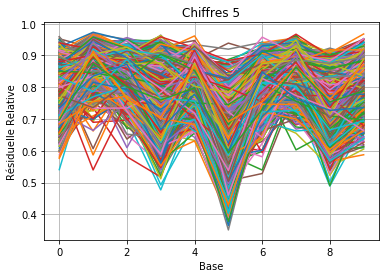

Temps de réalisation : 179.4594533443451 secondes


In [189]:
start=time.time()
courbe_chiffre(5,3)
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

**Tracé de la résiduelle relative d'un nombre X_test[i] à l'espace d'un nombre n en fonction du nombres d'éléments de la base utilisés**

In [175]:
def courbe_resid(X,n,i):
    plt.figure()
    y = [distance(X_test[i],n,k)/np.linalg.norm(X_test[i]) for k in range(1,11)]
    plt.plot(range(1,11), y)
    plt.title("Résiduelle Relative d'un  " + str(y_test[i]) + " à l'espace du " + str(n))
    plt.xlabel("Nombre d'éléments de la base")
    plt.ylabel('Résiduelle Relative')
    plt.grid(True)
    plt.show()

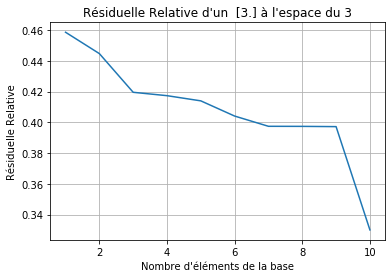

Temps de réalisation : 0.4706451892852783 secondes


In [177]:
start=time.time()
courbe_resid(X_test,3,5000)
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

In [180]:
L = list(range(10))